# Домашнее задание по исследованию жестких систем ОДУ. Вариант 13.5
### Работу выполнела Кондрашина Анна, 7111

Рассмотрим жесткую систему ОДУ, которая описывает изменение численность некоторой популяции двух видов и эволюцию некого генетического признака $\alpha$(экогенетическая модель):

$ \dot{x} = x\cdot(1-0.5 x-\frac{2}{7\alpha^2}\cdot y) $

$ \dot{y} = y\cdot(2\cdot \alpha - 3.5\cdot \alpha^2\cdot x -0.5\cdot y)$

$ \dot{\alpha} = \epsilon(2- 7\cdot \alpha x)$

Параметр $\epsilon \leq 0.01$, что означает, что генетический признак меняется незначительно. 
Начальные условия:

$ 0 <  x(0) <  1$

$ y(0) = 1.7$

$ \alpha (0) = 1$

Конечное время интегрирования $T_k = 3000$

Посмотрим, что можно сказать о нашей задаче: проверим,  действительно ли она жесткая. У системы будет два положения равновесия: $(\frac{2}{5};\frac{10}{7};\frac{5}{7})$ и $(2;0;\frac{1}{7})$. Линеаризуем систему и найдем собственные числа. Для наглядности покажем, как будут располагаться собственные числа на комплексной плоскости:

Для второго положения равновесия$(2;0;\frac{1}{7})$собственные числа будут располагаться следующим образом(см. картинка). Из графика видно, что спектр будет расадаться на жесткую и мягкую часть. Как мы увидим в дальнейшем, система будет стремится именно к этому положению равновесия

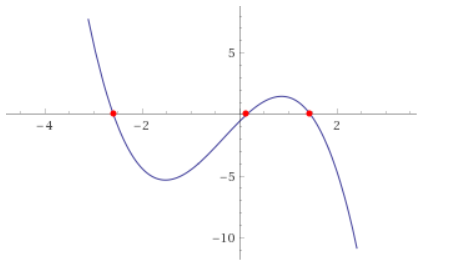

In [470]:
im1 = Image.open('второепр.png')

im1

Теперь построим численные решения разными методами. Для наглядности будем строить решения в объеме и проекции решений по осям 

In [628]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import numpy.linalg as ln
import pandas as pd
from scipy.optimize import newton_krylov
import scipy.optimize
import math
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [654]:
def f(x,e=0.001):
    return x[0]*(1-x[0]/2-2/(7*x[2]**2)*x[1])

def g(x,e=0.001):
    return x[1]*(2*x[2]-3.5*x[2]**2*x[0]-x[1]/2)

def h(x,e=0.001):
    return e*(2-7*x[2]*x[0])

def fgh(x,e = 0.001):
    res = f(x), g(x), h(x)
    return np.array(res)

def jac(x,e = 0.001):
    return np.array([[1-x[0]-2*x[1]/(7*x[2]**2), -2*x[0]/(7*x[2]**2), 4*x[0]*x[1]/(7*x[2]**3)],
                     [-3.5*x[2]**2*x[1], 2*x[2] -3.5*x[2]**2*x[0]-x[1], 2*x[1]-7*x[2]*x[0]],
                     [-7*x[2]*e,0, -7*e*x[0]]])
    

In [655]:
gamma = complex(0.5,0.5)
tau= 0.01
x_0 = [0.4,1.7,1]
w = np.array([0,0,0])
y = np.array(x_0)
tim = [0]
Tk = 3000

u = []
u.append(x_0)
A=np.eye(3)

In [656]:
while tim[-1]<Tk:
    B = np.array(jac(y))
    w = ln.solve(A-tau*gamma*B, func(y,0.01))
    y = y+tau*w.real
    u.append(y)
    tim.append(tim[-1]+tau)
    

In [657]:
ROSS_solution = pd.DataFrame(list(map(list,u)))


In [633]:
t = [0]
x_ans = [0.5]#y1_ans
y_ans = [1]#y_2 ans
a_ans = [1]

In [634]:
def func(y,param):
    e = 0.01
   
    
    return([y[0]*(1-0.5*y[0]-2/(7*y[2]**2)*y[1]),
            y[1]*(2*y[2]-3.5*y[2]**2*y[0]-0.5*y[1]),
            e*(2-7*y[2]*y[0])])

In [635]:
def RK2(start, stop, step, Cauchy, a, func):
    time = [0]
    solution = [np.array(Cauchy)]
    
    while time[-1] < stop:
        k1 = scipy.optimize.root((lambda k: func(solution[-1] + step * (1 + np.sqrt(2)) / 2 * k, a) - k), np.array(func(solution[-1], a))).x
        k2 = scipy.optimize.root((lambda k: func(solution[-1] + step * (-np.sqrt(2) * k1 + (1 + np.sqrt(2) / 2) * k), a) - k), np.array(func(solution[-1], a))).x
        time.append(time[-1] + step)
        solution.append(solution[-1] + step / 2 * (k1 + k2))
        
    return(time, solution)

In [636]:
def RK21(start, stop, step, Cauchy, a, func):
    time = [0]
    solution = [np.array(Cauchy)]
    
    while time[-1] < stop:
        k1 = scipy.optimize.root((lambda k: func(solution[-1] + step * (1 - np.sqrt(2)) / 2 * k, a) - k), np.array(func(solution[-1], a))).x
        k2 = scipy.optimize.root((lambda k: func(solution[-1] + step * (np.sqrt(2) * k1 + (1 - np.sqrt(2) / 2) * k), a) - k), np.array(func(solution[-1], a))).x
        time.append(time[-1] + step)
        solution.append(solution[-1] + step / 2 * (k1 + k2))
        
    return(time, solution)

In [639]:
def RK3(start, stop, step, Cauchy, a, func):
    time = [0]
    solution = [np.array(Cauchy)]
    
    while time[-1] < stop:
        k1 = scipy.optimize.root((lambda k: func(solution[-1] + step * (3 + np.sqrt(3)) / 6 * k, a) - k), func(solution[-1], a)).x
        k2 = scipy.optimize.root((lambda k: func(solution[-1] + step * (np.sqrt(3) / 3 * k1 + (3 + np.sqrt(3) / 6) * k), a) - k), func(solution[-1], a)).x
        time.append(time[-1] + step)
        solution.append(solution[-1] + step / 2 * (k1 + k2))
        
    return(time, solution)

In [640]:
RK2_time,RK2_solution = RK2(0, Tk, tau, [0.4,1.7,1], True, func)
RK21_time,RK21_solution = RK21(0, Tk, tau, [0.4,1.7,1], True, func)
RK3_time,RK3_solution = RK3(0, Tk, tau, [0.4,1.7,1], True, func)

In [641]:
RK2_sol= pd.DataFrame(list(map(list,RK2_solution)))
RK21_sol= pd.DataFrame(list(map(list,RK21_solution)))
RK3_sol= pd.DataFrame(list(map(list,RK3_solution)))

In [642]:
RK2_sol.shape

(300001, 3)

Построим численные решения метолом CROS(одностадийный метод Розенборка с комплексными коэффициентами). Формула для вычисления следующего шага решения: 
$$ ( \textbf{E} - h\cdot \frac{1+i}{2}\cdot \textbf{Jac}(t_n,y_n)\cdot \omega = f(t_n +h, h*y_n)$$
$$ y_{n+1} = y_n+h\cdot Re(\omega)$$

А так же численные решения методом Рунге-Кутты второго и третьего порядка апроксимации с таблицами Бутчера: 
Таблица 1:
$A = \begin{pmatrix}
    \frac{1 + \sqrt{2}}{2} & 0\\
    -\sqrt{2} & \frac{1 + \sqrt{2}}{2}
\end{pmatrix}$

$b = \begin{pmatrix}
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}$

$c = \begin{pmatrix}
\frac{1 + \sqrt{2}}{2}\\
\frac{1 - \sqrt{2}}{2}
\end{pmatrix}$


Таблица 2:


$A = \begin{pmatrix}
    \frac{1- \sqrt{2}}{2} & 0\\
    \sqrt{2} & \frac{1 - \sqrt{2}}{2}
\end{pmatrix}$

$b = \begin{pmatrix}
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}$

$c = \begin{pmatrix}
\frac{1 - \sqrt{2}}{2}\\
\frac{1 + \sqrt{2}}{2}
\end{pmatrix}$


Таблица 3:

$A = \begin{pmatrix}
    \frac{3 + \sqrt{3}}{6} & 0\\
    \frac{3-2\sqrt{3}}{6} & \frac{3 + \sqrt{3}}{6}
\end{pmatrix}$

$b = \begin{pmatrix}
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}$

$c = \begin{pmatrix}
\frac{3 + \sqrt{3}}{6}\\
\frac{3 - \sqrt{3}}{6}
\end{pmatrix}$

<Figure size 432x288 with 0 Axes>

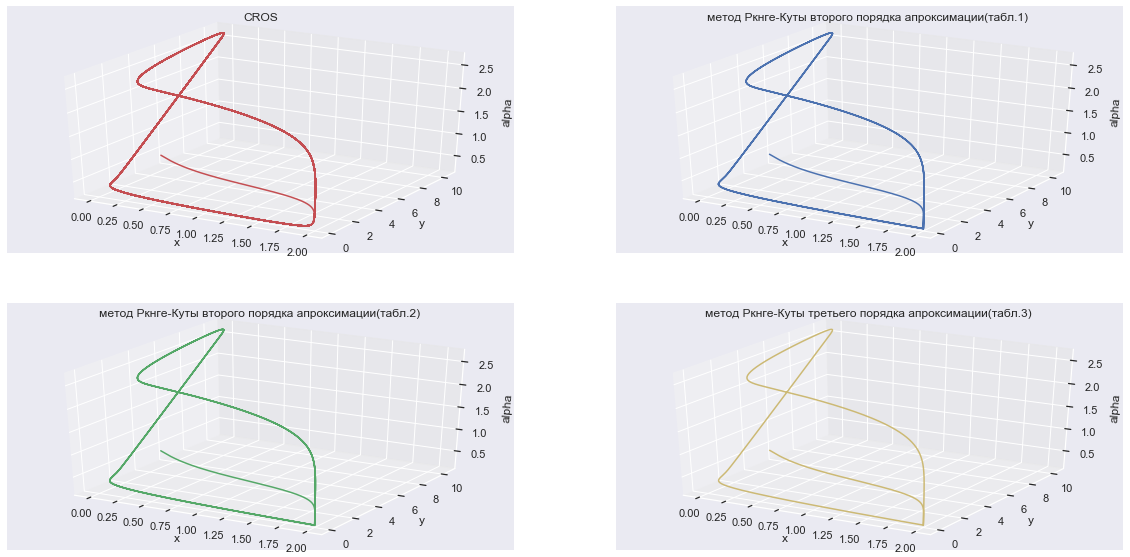

In [659]:
fig = plt.figure()


fig = plt.figure(figsize = (20, 10))

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

ax1.set_title('CROS')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('alpha')
ax1.plot(ROSS_solution[0],ROSS_solution[1], zs = ROSS_solution[2], color='r')

ax2.set_title('метод Ркнге-Куты второго порядка апроксимации(табл.1) ')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('alpha')
ax2.plot(RK2_sol[0],RK2_sol[1], zs = RK2_sol[2], color='b')

ax3.set_title('метод Ркнге-Куты второго порядка апроксимации(табл.2) ')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('alpha')
ax3.plot(RK21_sol[0],RK21_sol[1], zs = RK21_sol[2], color='g')

ax4.set_title('метод Ркнге-Куты третьего порядка апроксимации(табл.3) ')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('alpha')
ax4.plot(RK3_sol[0],RK3_sol[1], zs = RK3_sol[2], color='y')




plt.show()

Теперь построим зависимость каждой из трех полученных численно функций от времени. Для наглядности построим разность решений, полученные разными одношаговыми численными методами, на одном графике. 


<Figure size 432x288 with 0 Axes>

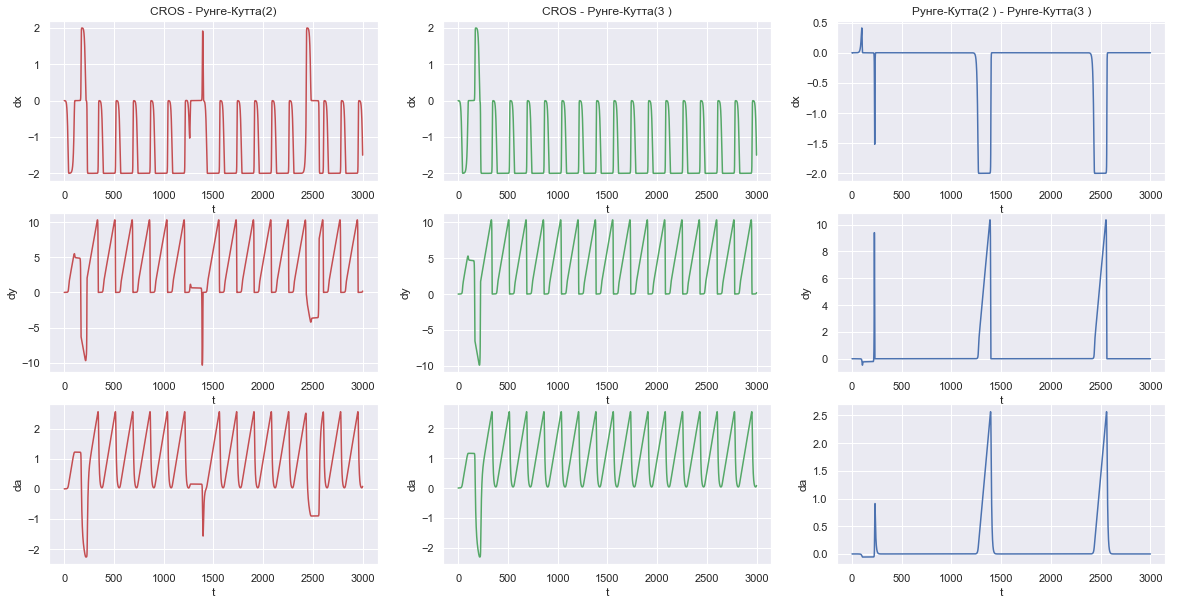

In [660]:
fig = plt.figure()


fig = plt.figure(figsize = (20, 10))

ax11 = fig.add_subplot(331)
ax12 = fig.add_subplot(332)
ax13 = fig.add_subplot(333)
ax21 = fig.add_subplot(334)
ax22 = fig.add_subplot(335)
ax23 = fig.add_subplot(336)
ax31 = fig.add_subplot(337)
ax32 = fig.add_subplot(338)
ax33 = fig.add_subplot(339)


ax11.set_title('CROS - Рунге-Кутта(2)')
ax11.set_xlabel('t')
ax11.set_ylabel('dx')
ax11.plot(tim,ROSS_solution[0]-RK2_sol[0], color='r')

ax12.set_title('CROS - Рунге-Кутта(3 )')
ax12.set_xlabel('t')
ax12.set_ylabel('dx')
ax12.plot(tim,ROSS_solution[0]-RK3_sol[0], color='g')

ax13.set_title('Рунге-Кутта(2 ) - Рунге-Кутта(3 )')
ax13.set_xlabel('t')
ax13.set_ylabel('dx')
ax13.plot(tim,RK2_sol[0]-RK3_sol[0], color='b')


ax21.set_xlabel('t')
ax21.set_ylabel('dy')
ax21.plot(tim,ROSS_solution[1]-RK2_sol[1], color='r')

ax22.set_xlabel('t')
ax22.set_ylabel('dy')
ax22.plot(tim,ROSS_solution[1]-RK3_sol[1], color='g')

ax23.set_xlabel('t')
ax23.set_ylabel('dy')
ax23.plot(tim,RK2_sol[1]-RK3_sol[1], color='b')


ax31.set_xlabel('t')
ax31.set_ylabel('da')
ax31.plot(tim,ROSS_solution[2]-RK2_sol[2], color='r')

ax32.set_xlabel('t')
ax32.set_ylabel('da')
ax32.plot(tim,ROSS_solution[2]-RK3_sol[2], color='g')

ax33.set_xlabel('t')
ax33.set_ylabel('da')
ax33.plot(tim,RK2_sol[2]-RK3_sol[2], color='b')







plt.show()

Теперь получим решение при помощи могошаговых методов и сравним их с решениями одношаговых методов 

In [645]:
def FDN2(start, stop, step, Cauchy, a, func):
    time, sol = RK2(start, start + step, step, Cauchy, a, func)
    
    while time[-1] < stop:
        time.append(time[-1] + step)
        new_y = scipy.optimize.root(lambda y: step * np.array(func(y, a)) - 3 / 2 * y + 2 * sol[-1] - 1 / 2 * sol[-2], sol[-1]).x
        sol.append(new_y)
        
    return(time, sol)

In [646]:
def Nord(start, stop, step, Cauchy, a, func):
    z_new = Cauchy
    z_new1 = [0,0,0]
    z_new2 = [0,0,0]
    
    sol = []
    sol1 = []
    sol2 = []
    
    sol.append(z_new)
    sol1.append(z_new1)
    sol2.append(z_new2)
    
    time = [start]
    
    while time[-1]<stop:
        time.append(time[-1] + step)
        z_new = scipy.optimize.root(lambda y: y - np.array(sol[-1]) - np.array(sol1[-1])- np.array(sol2[-1]) - 2/3*(np.array(func(y,a))*step - np.array(sol1[-1])-2*np.array(sol2[-1])), sol[-1],method = 'hybr').x
        
        z_new1 += 2*np.array(sol2[-1])+(np.array(func(z_new,a))*step - np.array(sol1[-1])-2*np.array(sol2[-1]))
        z_new2 += 1/3*(np.array(func(z_new,a))*step - np.array(sol1[-1])-2*np.array(sol2[-1]))
        sol.append(list(z_new))
        sol1.append(list(z_new1))
        sol2.append(list(z_new2))
    return time, sol
    

In [647]:
time_FDN2, sol_FDN2 =FDN2(0,Tk, 0.01, [0.4,1.7,1],True,func)
time_Nord, sol_Nord= Nord(0,Tk, 0.01, [0.4,1.7,1],True,func)


In [662]:
Nord_solution = pd.DataFrame(list(map(list,sol_Nord)))
FDN2_solution = pd.DataFrame(list(map(list,sol_FDN2)))

Для начала построим трехмерные графики полученных решений. Тут, пожалуй, стоит отметить, что для построения решения методом ФДН нам пришлось достроить недостающее начальное условие методом Рунге-Кутты. Метод Нордсика же является самостоятельно стартующим, то есть при старте можно положить начальный ветор Нордсика равным, например, $(z_0,0,0)$ или $(z_0,hf(z_0),0)$ и тд, что позволит начать вычисления. Стартуя как метод меньшего пордка апроксимации, после прохождения "разгонного" участка, метод стремится к максимально возможному для данной задачи порядку апроксимации. 

<Figure size 432x288 with 0 Axes>

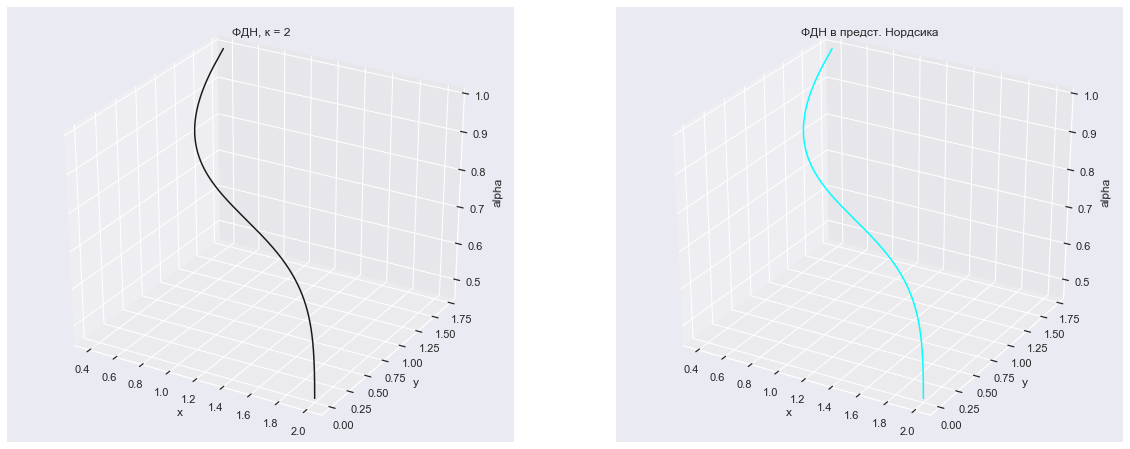

In [663]:
fig = plt.figure()


fig = plt.figure(figsize = (20, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


ax1.set_title('ФДН, к = 2')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('alpha')
ax1.plot(FDN2_solution[0],FDN2_solution[1], zs = FDN2_solution[2], color='k')

ax2.set_title('ФДН в предст. Нордсика')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('alpha')
ax2.plot(Nord_solution[0],Nord_solution[1], zs =Nord_solution[2], color='cyan')






plt.show()

Теперь посмотрим на зависимость каждой из полученных числено функций (х, у и  альфа) от времени и не разницу между решениями полученными многостадийными методами ФДН и ФДН в представлении Нордсика. Графики ошибок будут иметь существенные пики в начале. Можно предположить, что это и есть "разгоночный" участок метода ФДН в представлении Нордсика

<Figure size 432x288 with 0 Axes>

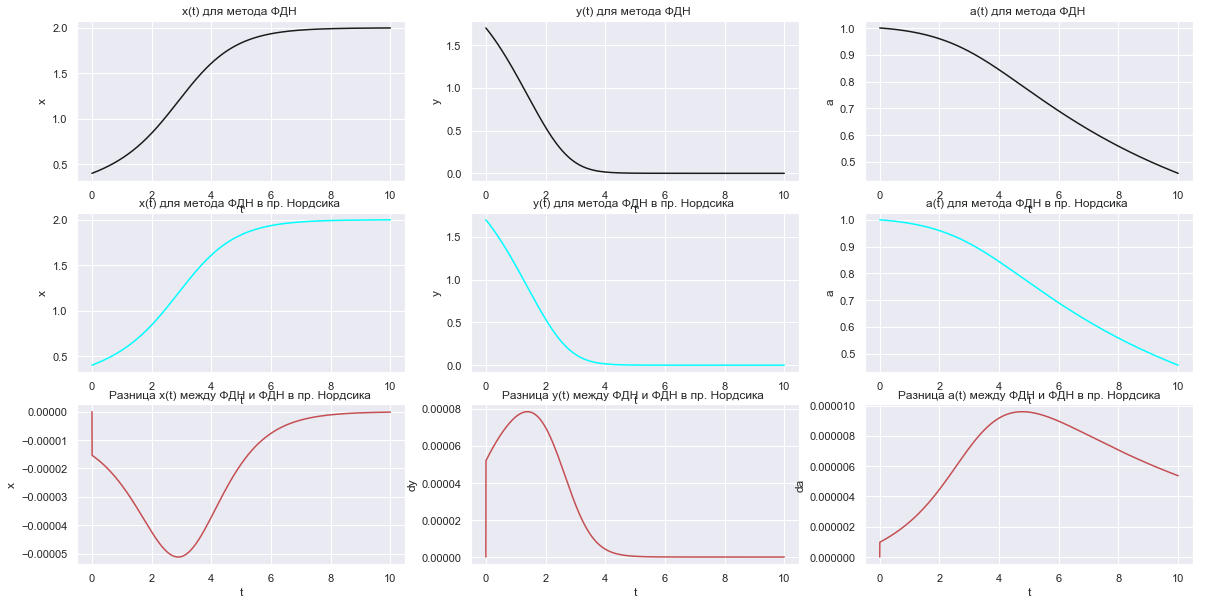

In [664]:
fig = plt.figure()


fig = plt.figure(figsize = (20, 10))

ax11 = fig.add_subplot(331)
ax12 = fig.add_subplot(332)
ax13 = fig.add_subplot(333)
ax21 = fig.add_subplot(334)
ax22 = fig.add_subplot(335)
ax23 = fig.add_subplot(336)
ax31 = fig.add_subplot(337)
ax32 = fig.add_subplot(338)
ax33 = fig.add_subplot(339)


ax11.set_title('x(t) для метода ФДН ')
ax11.set_xlabel('t')
ax11.set_ylabel('x')
ax11.plot(time_FDN2,FDN2_solution[0], color='k')

ax12.set_title('y(t) для метода ФДН ')
ax12.set_xlabel('t')
ax12.set_ylabel('y')
ax12.plot(time_FDN2,FDN2_solution[1], color='k')

ax13.set_title('a(t) для метода ФДН ')
ax13.set_xlabel('t')
ax13.set_ylabel('a')
ax13.plot(time_FDN2,FDN2_solution[2], color='k')

ax21.set_title('x(t) для метода ФДН в пр. Нордсика ')
ax21.set_xlabel('t')
ax21.set_ylabel('x')
ax21.plot(time_Nord,Nord_solution[0], color='cyan')

ax22.set_title('y(t) для метода ФДН в пр. Нордсика ')
ax22.set_xlabel('t')
ax22.set_ylabel('y')
ax22.plot(time_Nord,Nord_solution[1], color='cyan')

ax23.set_title('a(t) для метода ФДН в пр. Нордсика ')
ax23.set_xlabel('t')
ax23.set_ylabel('a')
ax23.plot(time_Nord,Nord_solution[2], color='cyan')

ax31.set_title('Разница х(t) между ФДН и ФДН в пр. Нордсика ')
ax31.set_xlabel('t')
ax31.set_ylabel('x')
ax31.plot(time_Nord,Nord_solution[0]-FDN2_solution[0], color='r')

ax32.set_title('Разница y(t) между ФДН и ФДН в пр. Нордсика ')
ax32.set_xlabel('t')
ax32.set_ylabel('dy')
ax32.plot(time_Nord,Nord_solution[1]-FDN2_solution[1], color='r')

ax33.set_title('Разница a(t) между ФДН и ФДН в пр. Нордсика')
ax33.set_xlabel('t')
ax33.set_ylabel('da')
ax33.plot(time_Nord,Nord_solution[2]-FDN2_solution[2], color='r')







plt.show()

Так как мы не знаем точный вид нашего решения, будем считать что ФДН2 лучше всего приблежает решение и оценим апостериорную погрешность относительно этого метода. 
Для начала оценим апостериорную погрешность метода ФДН в представлении Нордсика. Изменяя шаг построения численного решения, получим, что данный метод будет иметь примерно первый порядок апроксимации, однако если не учитывать стартовый участок - порядок апроксимации будет больше

In [665]:
er=[]
st = []
erc = []
for i in range(5):
    tau = 4**(-i-2)
    time_FDN2, sol_FDN2 =FDN2(0,10, tau, [0.4,1.7,1],True,func)
    time_Nord, sol_Nord= Nord(0,10, tau, [0.4,1.7,1],True,func)
    st.append(tau)
    max_er = np.max(np.array(sol_FDN2)-np.array(sol_Nord))
    
    er.append(max_er)
    

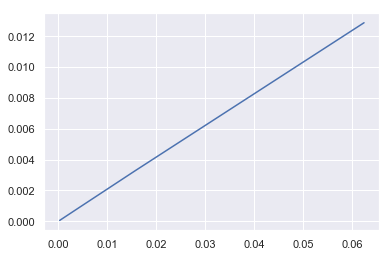

In [652]:
plt.plot(st,er)

Теперь сравним одностадийные методы с решением, полученным при помощи ФНД. Оценивать погрешность буде тем же методом. 

ValueError: x and y must have same first dimension, but have shapes (40961,) and (300001,)

<Figure size 432x288 with 0 Axes>

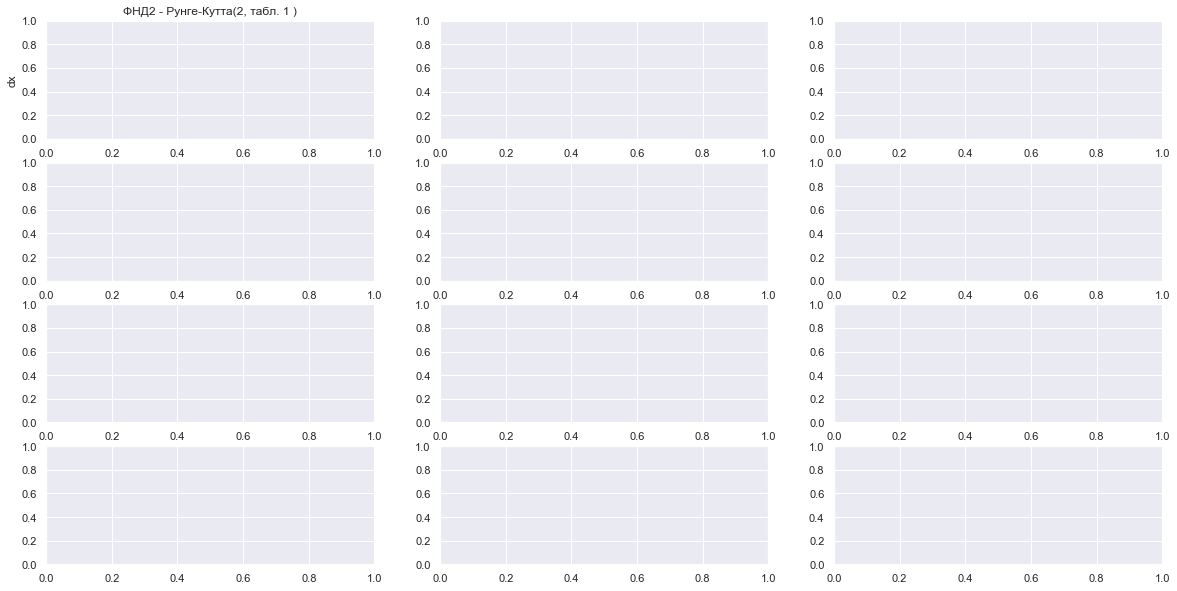

In [653]:
fig = plt.figure()


fig = plt.figure(figsize = (20, 10))

ax11 = fig.add_subplot(431)
ax12 = fig.add_subplot(432)
ax13 = fig.add_subplot(433)
ax21 = fig.add_subplot(434)
ax22 = fig.add_subplot(435)
ax23 = fig.add_subplot(436)
ax31 = fig.add_subplot(437)
ax32 = fig.add_subplot(438)
ax33 = fig.add_subplot(439)
ax41 = fig.add_subplot(4,3,10)
ax42 = fig.add_subplot(4,3,11)
ax43 = fig.add_subplot(4,3,12)


ax11.set_title('ФНД2 - Рунге-Кутта(2, табл. 1 )')
ax11.set_ylabel('dx')
ax11.plot(time_FDN2,FDN2_solution[0]-RK2_sol[0], color='g')

ax12.set_title('ФНД2 - Рунге-Кутта(2, табл. 1)')
ax12.set_ylabel('dy')
ax12.plot(time_FDN2,FDN2_solution[1]-RK21_sol[1], color='g')

ax13.set_title('Рунге-Кутта(табл. 1 ) - Рунге-Кутта(2, табл. 1 )')
ax13.set_ylabel('da')
ax13.plot(time_FDN2,FDN2_solution[2]-RK3_sol[2], color='g')

ax21.set_title('ФНД2 - Рунге-Кутта(2, табл. 2 )')
ax21.set_ylabel('dx')
ax21.plot(time_FDN2,FDN2_solution[0]-RK21_sol[0], color='b')

ax22.set_title('ФНД2 - Рунге-Кутта(2, табл. 2 )')
ax22.set_ylabel('dy')
ax22.plot(time_FDN2,FDN2_solution[1]-RK21_sol[1], color='b')

ax23.set_title('ФНД2 - Рунге-Кутта(2, табл. 2 )')
ax23.set_ylabel('dy')
ax23.plot(time_FDN2,FDN2_solution[2]-RK21_sol[2], color='b')

ax31.set_title('ФНД2 - Рунге-Кутта(3, табл. 3 )')
ax31.set_ylabel('dx')
ax31.plot(time_FDN2,FDN2_solution[0]-RK3_sol[0], color='r')

ax32.set_title('ФНД2 - ROSS')
ax32.set_ylabel('dy')
ax32.plot(time_FDN2,FDN2_solution[1]-RK3_sol[1], color='r')

          
ax33.set_title('ФНД2 - ROSS')
ax33.set_ylabel('da')
ax33.plot(time_FDN2,FDN2_solution[2]-RK3_sol[2], color='r')

ax41.set_title('ФНД2 - ROSs')
ax41.set_xlabel('t')
ax41.set_ylabel('dx')
ax41.plot(time_FDN2,FDN2_solution[0]-ROSS_solution[0], color='y')

ax42.set_title('ФНД2 - ROSS')
ax42.set_xlabel('t')
ax42.set_ylabel('dy')
ax42.plot(time_FDN2,FDN2_solution[1]-ROSS_solution[1], color='y')

ax43.set_title('ФНД2 - ROSs')
ax43.set_xlabel('t')
ax43.set_ylabel('da')
ax43.plot(time_FDN2,FDN2_solution[2]-ROSS_solution[2], color='y')






plt.show()

Таким образом, апостериорная погрешность одностадийных методов тоже будет порядка шага построения численного решения

В завершении этой работы вычислим и построим функции учтойчивости указанных методов. Функция устойчивости имеет вид:

$$R(z) = \frac{det(E - zA + zeb^{T})}{det(E - zA)}$$

Построим функцию устойчивости для таблицы Бутчера, указанной ниже:
$$
A = \left(
\begin{array}
    +\frac{2+\sqrt{2}}{2} & 0\\
    -\sqrt{2} & \frac{2+\sqrt{2}}{2}\\
\end{array}
\right),
b = \left(
\begin{array}
    +\frac{1}{2} & \frac{1}{2}
\end{array}
\right),
$$

Здесь и далее светлозеленым будем рисовать область неустойчивости функции, а темнозеленым - областб устойчивости 

In [ ]:
rA = np.array([[(1 + math.sqrt(2)) / 2, 0], [-math.sqrt(2), (1 + math.sqrt(2)) / 2]])
rE = np.array([[1, 0], [0, 1]])
rB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])

z = [] 
R = []

fig = plt.figure(figsize = (7, 7))

x = []
y = []
c = []

for i in range(-500, 500):
    for j in range(-500, 500):
        z = complex(i / 100, j / 100)
        R = abs(np.linalg.det(rE - z * rA + z * rB) / np.linalg.det(rE - z * rA))
        x.append(i / 100)
        y.append(j / 100)
        
        if (R > 1):
            c.append("lightgreen")
        else:
            c.append("yellowgreen")
plt.scatter(x, y, color = c)
plt.xlim(-1, 5)
plt.ylim(-3, 3)
plt.xlabel("Real")
plt.ylabel("Image")
plt.show()

Теперь построим функцию устойчивости для метода Рунге-Кутты второго порядка апроксимации, который имеет следующую таблицу Бутчера:

Построим функцию устойчивости для таблицы Бутчера, указанной ниже:
$$
A = \left(
\begin{array}
    +\frac{2-\sqrt{2}}{2} & 0\\
    \sqrt{2} & \frac{2-\sqrt{2}}{2}\\
\end{array}
\right),
b = \left(
\begin{array}
    +\frac{1}{2} & \frac{1}{2}
\end{array}
\right),
$$



In [ ]:
rA = np.array([[(1 - math.sqrt(2)) / 2, 0], [math.sqrt(2), (1 - math.sqrt(2)) / 2]])
rE = np.array([[1, 0], [0, 1]])
rB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])

z = [] 
R = []

fig = plt.figure(figsize = (7, 7))

x = []
y = []
c = []

for i in range(-500, 500):
    for j in range(-500, 500):
        z = complex(i / 100, j / 100)
        R = abs(np.linalg.det(rE - z * rA + z * rB) / np.linalg.det(rE - z * rA))
        x.append(i / 100)
        y.append(j / 100)
        
        if (R > 1):
            c.append("lightgreen")
        else:
            c.append("yellowgreen")
plt.scatter(x, y, color = c)
plt.xlim(-1.5, 1)
plt.ylim(-1.5, 1.5)
plt.xlabel("Real")
plt.ylabel("Image")
plt.show()

А теперь построим функцию устойчивости для метода Рунге-Кутты третьего порядка апроксимаци, который имеет таблицу Бутчера:

Построим функцию устойчивости для таблицы Бутчера, указанной ниже:
$$
A = \left(
\begin{array}
    +\frac{3+\sqrt{3}}{6} & 0\\
    \frac{3-2\sqrt{3}}{6} & \frac{3+\sqrt{3}}{6}\\
\end{array}
\right),
b = \left(
\begin{array}
    +\frac{1}{2} & \frac{1}{2}
\end{array}
\right),
$$



In [ ]:
rA = np.array([[(3 + math.sqrt(3)) / 6, 0], [math.sqrt(3) / 3, (3 + math.sqrt(3)) / 6]])
rE = np.array([[1, 0], [0, 1]])
rB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])

z = [] 
R = []

fig = plt.figure(figsize = (7, 7))

x = []
y = []
c = []

for i in range(-500, 500):
    for j in range(-500, 500):
        z = complex(i / 100, j / 100)
        R = abs(np.linalg.det(rE - z * rA + z * rB) / np.linalg.det(rE - z * rA))
        x.append(i / 100)
        y.append(j / 100)
        
        if (R > 1):
            c.append("lightgreen")
        else:
            c.append("yellowgreen")
            
plt.scatter(x, y, color = c)
plt.xlabel("Real")
plt.ylabel("Image")
plt.xlim(-1, 5)
plt.ylim(-3, 3)
plt.show()

Теперь построим функцию устойчивости для метода CROS. Для Этого метода она будет иметь вид:
$$ R(z) = \frac{1}{1-z-z^2/2} $$

In [ ]:

z = [] 
R = []

x = []
y = []
c = []

for i in range(-500, 500):
    for j in range(-500, 500):
        z = complex(i / 100, j / 100)
        if (1-z+z**2/2) !=0:
            R = abs(1/(1-z+z**2/2))
        else:
            R = 0
        x.append(i / 100)
        y.append(j / 100)
        
        if (R > 1):
            c.append("lightgreen")
        else:
            c.append("yellowgreen")
plt.scatter(x, y, color = c)
plt.xlim(-1, 2)
plt.ylim(-3, 3)
plt.xlabel("Real")
plt.ylabel("Image")

plt.show()

Напоследок построим функию устойчивости для формулы дифференциирования назад второго порядка.
 Будем использовать следующие соотношения:

$y_{n+1} = R(z)y_{n} = R^{2}(z)y_{n-1}$

$f_{n+1} = \lambda y_{n+1}$

$z = \lambda h$

Для всех методов ФДН удобнее получать в явном виде зависимость $z = z(R)$ чем $R = R(z)$. Для ФДН второго порядка аппроксимации имеем:

$z(R) = \frac{\frac{3}{2} R^{2}(z) - 2R(z) + \frac{1}{2}}{R^{2}(z)}$

In [ ]:
z = [] 
R = []

fig = plt.figure(figsize = (7, 7))

x = []
y = []
c = []

for i in range(-200, 200):
    for j in range(-200, 200):
        if (i / 10 > 4.5 or i / 10 < 0) or (j / 10 > 3 or j / 10 < -3):
            x.append(i / 10)
            y.append(j / 10)
            c.append("yellowgreen")

for i in range(-300, 300):
    for j in range(-300, 300):
        R = complex(i / 100, j / 100)
        if (R != 0):
            z = (3 / 2 * R * R - 2 * R + 1 / 2) / R / R
            x.append(z.real)
            y.append(z.imag)

            if (abs(R) > 1):
                c.append("lightgreen")
            else:
                c.append("yellowgreen")
            
plt.scatter(x, y, color = c)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.xlabel("Real")
plt.ylabel("Image")
plt.show()